In [1105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from statsmodels.stats.outliers_influence import variance_inflation_factor


## 1. Understanding the data

#### Data Dictionary

=========================================
Dataset characteristics
======================

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


#### Load the file day.csv

In [1106]:
bike = pd.read_csv("day.csv")

#### Check for missing values

In [1107]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### No missing values found. let's check the shape

In [1108]:
bike.shape

(730, 16)

#### Glance into the data set

In [1109]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### High level analysis of data set

In [1110]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Check correlation matrix

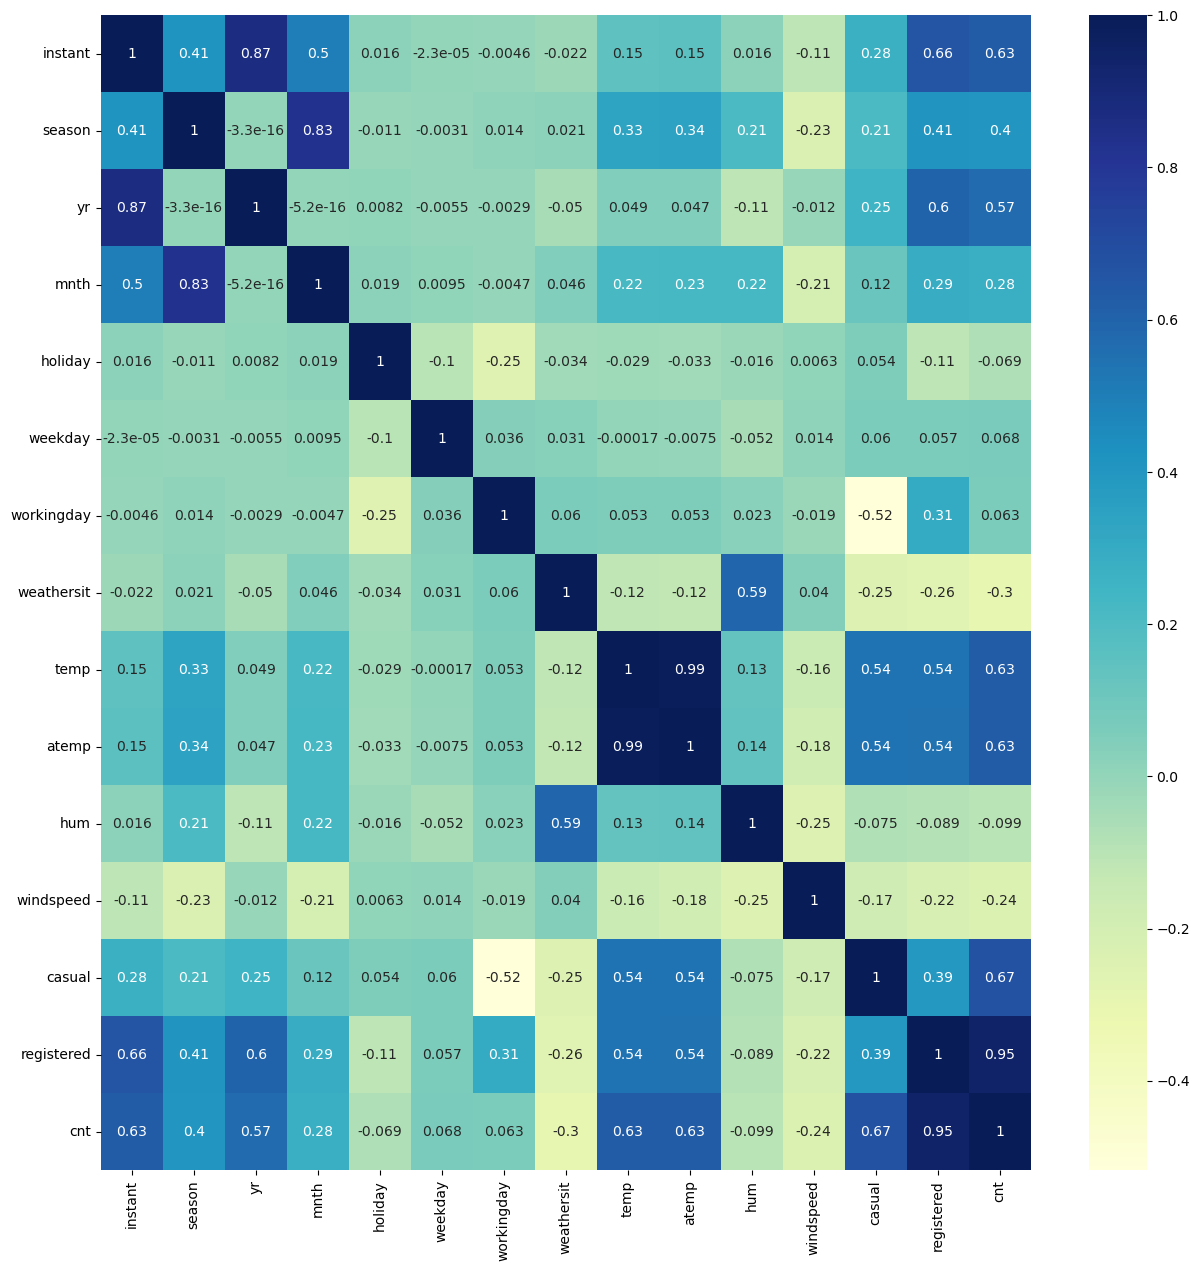

In [1111]:
plt.figure(figsize=(15,15))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### - Observations : The scales are different for various columns. we will need to normalize and also hot encode columns like mnth, year, weathersit. Before that let's remove following columns which doesn't make sense:--

    - instant (This is just the id and it won't add useful information)
    - dteday ( we already have information about year and month in yr and mnth column, so can be removed)
    - temp and atemp gives similar information and highly correlated. we will drop temp
    - mnth and season are highly correlated. We can remove month as it's contibuting less to cnt when compared to season

## 2. Data cleanup

#### Dropping columns instant, dteday, temp, and mnth based on above observation

In [1071]:
# check shape

bike.shape

(730, 16)

In [1072]:
bike = bike.drop(columns=["instant", "dteday", "temp", "mnth"])
bike.shape, bike.head()

((730, 12),
    season  yr  holiday  weekday  workingday  weathersit     atemp      hum  \
 0       1   0        0        6           0           2  18.18125  80.5833   
 1       1   0        0        0           0           2  17.68695  69.6087   
 2       1   0        0        1           1           1   9.47025  43.7273   
 3       1   0        0        2           1           1  10.60610  59.0435   
 4       1   0        0        3           1           1  11.46350  43.6957   
 
    windspeed  casual  registered   cnt  
 0  10.749882     331         654   985  
 1  16.652113     131         670   801  
 2  16.636703     120        1229  1349  
 3  10.739832     108        1454  1562  
 4  12.522300      82        1518  1600  )

#### check/drop duplicates 

In [1073]:
bike = bike.drop_duplicates()
bike.shape

(730, 12)

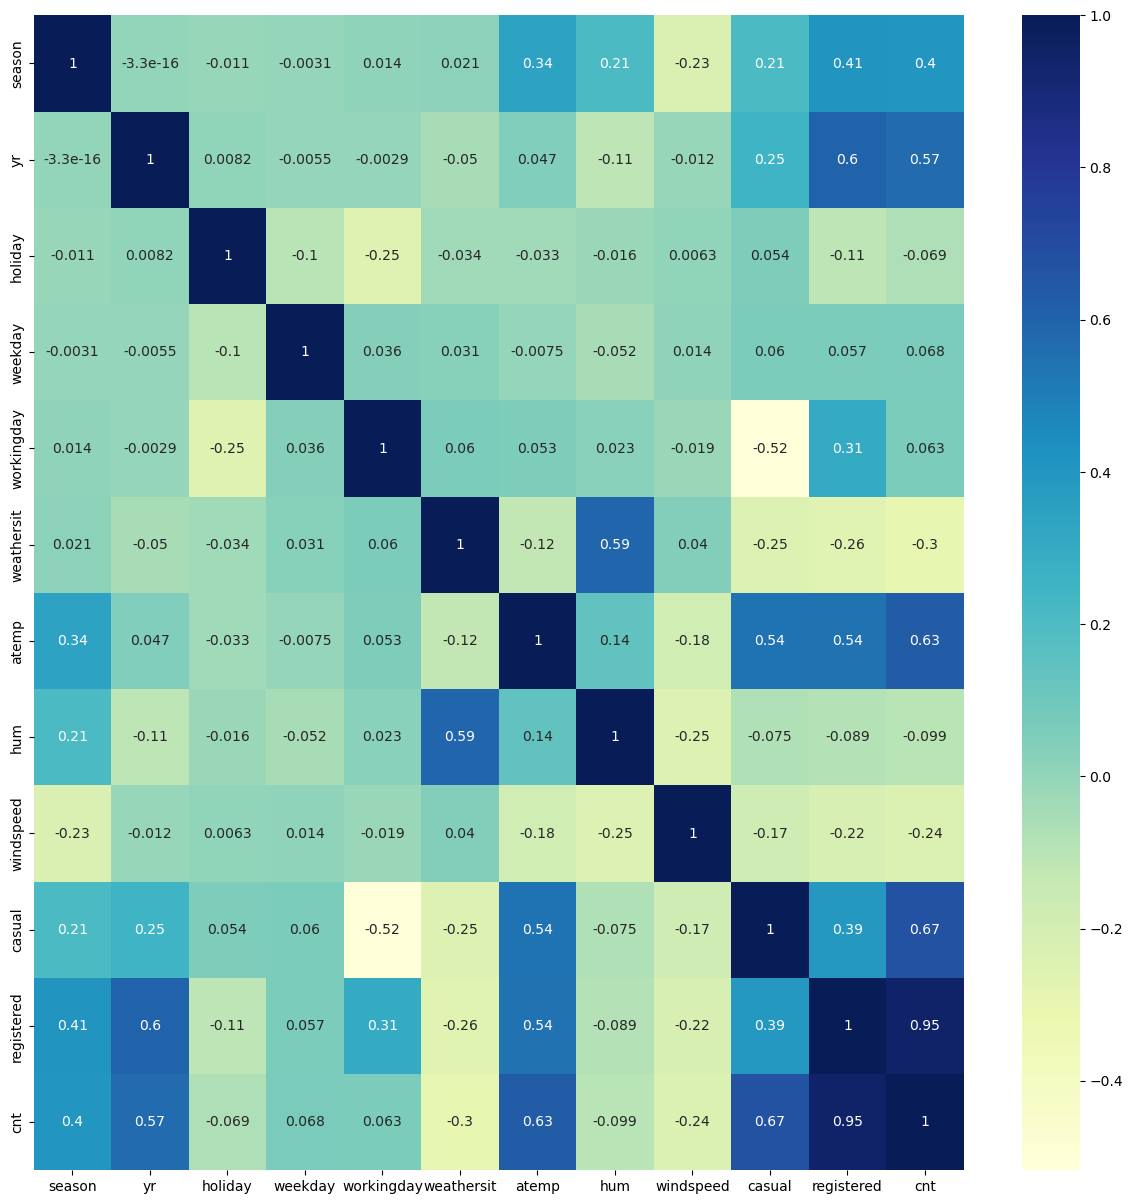

In [1074]:
plt.figure(figsize=(15,15))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

## 3. 1-hot encoding on Weathersit, season, weekday

#### 1-hot encoding on Weathersit

    - 00 means 'Clear_Weather'
    - 10 means 'Mist_or_cloud'
    - 01 means 'light rain'

In [1075]:
weather = pd.get_dummies(bike['weathersit'],drop_first = True)
weather.rename(columns={1:'Clear_Weather', 2:'Mist_or_cloud', 3:'Light_rain'}, inplace=True)
weather.head()

,Mist_or_cloud,Light_rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [1076]:
#Concatenate weather to bike
bike = pd.concat([bike,weather], axis=1)
bike.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,Mist_or_cloud,Light_rain
0,1,0,0,6,0,2,18.18125,80.5833,10.749882,331,654,985,1,0
1,1,0,0,0,0,2,17.68695,69.6087,16.652113,131,670,801,1,0
2,1,0,0,1,1,1,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,1,0,0,2,1,1,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,1,0,0,3,1,1,11.46350,43.6957,12.522300,82,1518,1600,0,0


#### 1-hot encoding on season

    - 000 means 'spring'
    - 100 means 'summer'
    - 010 means 'fall'
    - 001 means 'winter'

In [1077]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [1078]:
season_name = pd.get_dummies(bike['season'], drop_first = True)
season_name.rename(columns={2:'summer', 3:'fall', 4:'winter'}, inplace=True)
season_name.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [1079]:
# Concatenate season_name to bike
bike = pd.concat([bike,season_name], axis=1)
bike.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,Mist_or_cloud,Light_rain,summer,fall,winter
0,1,0,0,6,0,2,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,1,0,0,0,0,2,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,1,0,0,1,1,1,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,1,0,0,2,1,1,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,1,0,0,3,1,1,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


#### 1-hot encoding on weekday

    - 000000 means 'Sunday'
    - 100000 means 'Monday'
    - 010000 means 'Tuesday'
    - 001000 means 'Wednesday'
    - 000100 means 'Thursday'
    - 000010 means 'Friday'
    - 000001 means 'Saturday'

In [1080]:
Weekday_name = pd.get_dummies(bike.weekday)
Weekday_name.rename(columns={0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)
Weekday_name = Weekday_name.drop(columns=['Sun'], axis=1)

In [1081]:
# Concatenate Weekday_name to bike
bike = pd.concat([bike,Weekday_name], axis=1)
bike.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,Mist_or_cloud,Light_rain,summer,fall,winter,Mon,Tue,Wed,Thu,Fri,Sat
0,1,0,0,6,0,2,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,2,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,1,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,2,1,1,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,3,1,1,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,1,0,0,0


#### Drop 'weekday','season','weathersit' as we already did 1-hot encoding for these columns

In [1082]:
bike = bike.drop(columns=['weekday','season','weathersit'], axis =1)


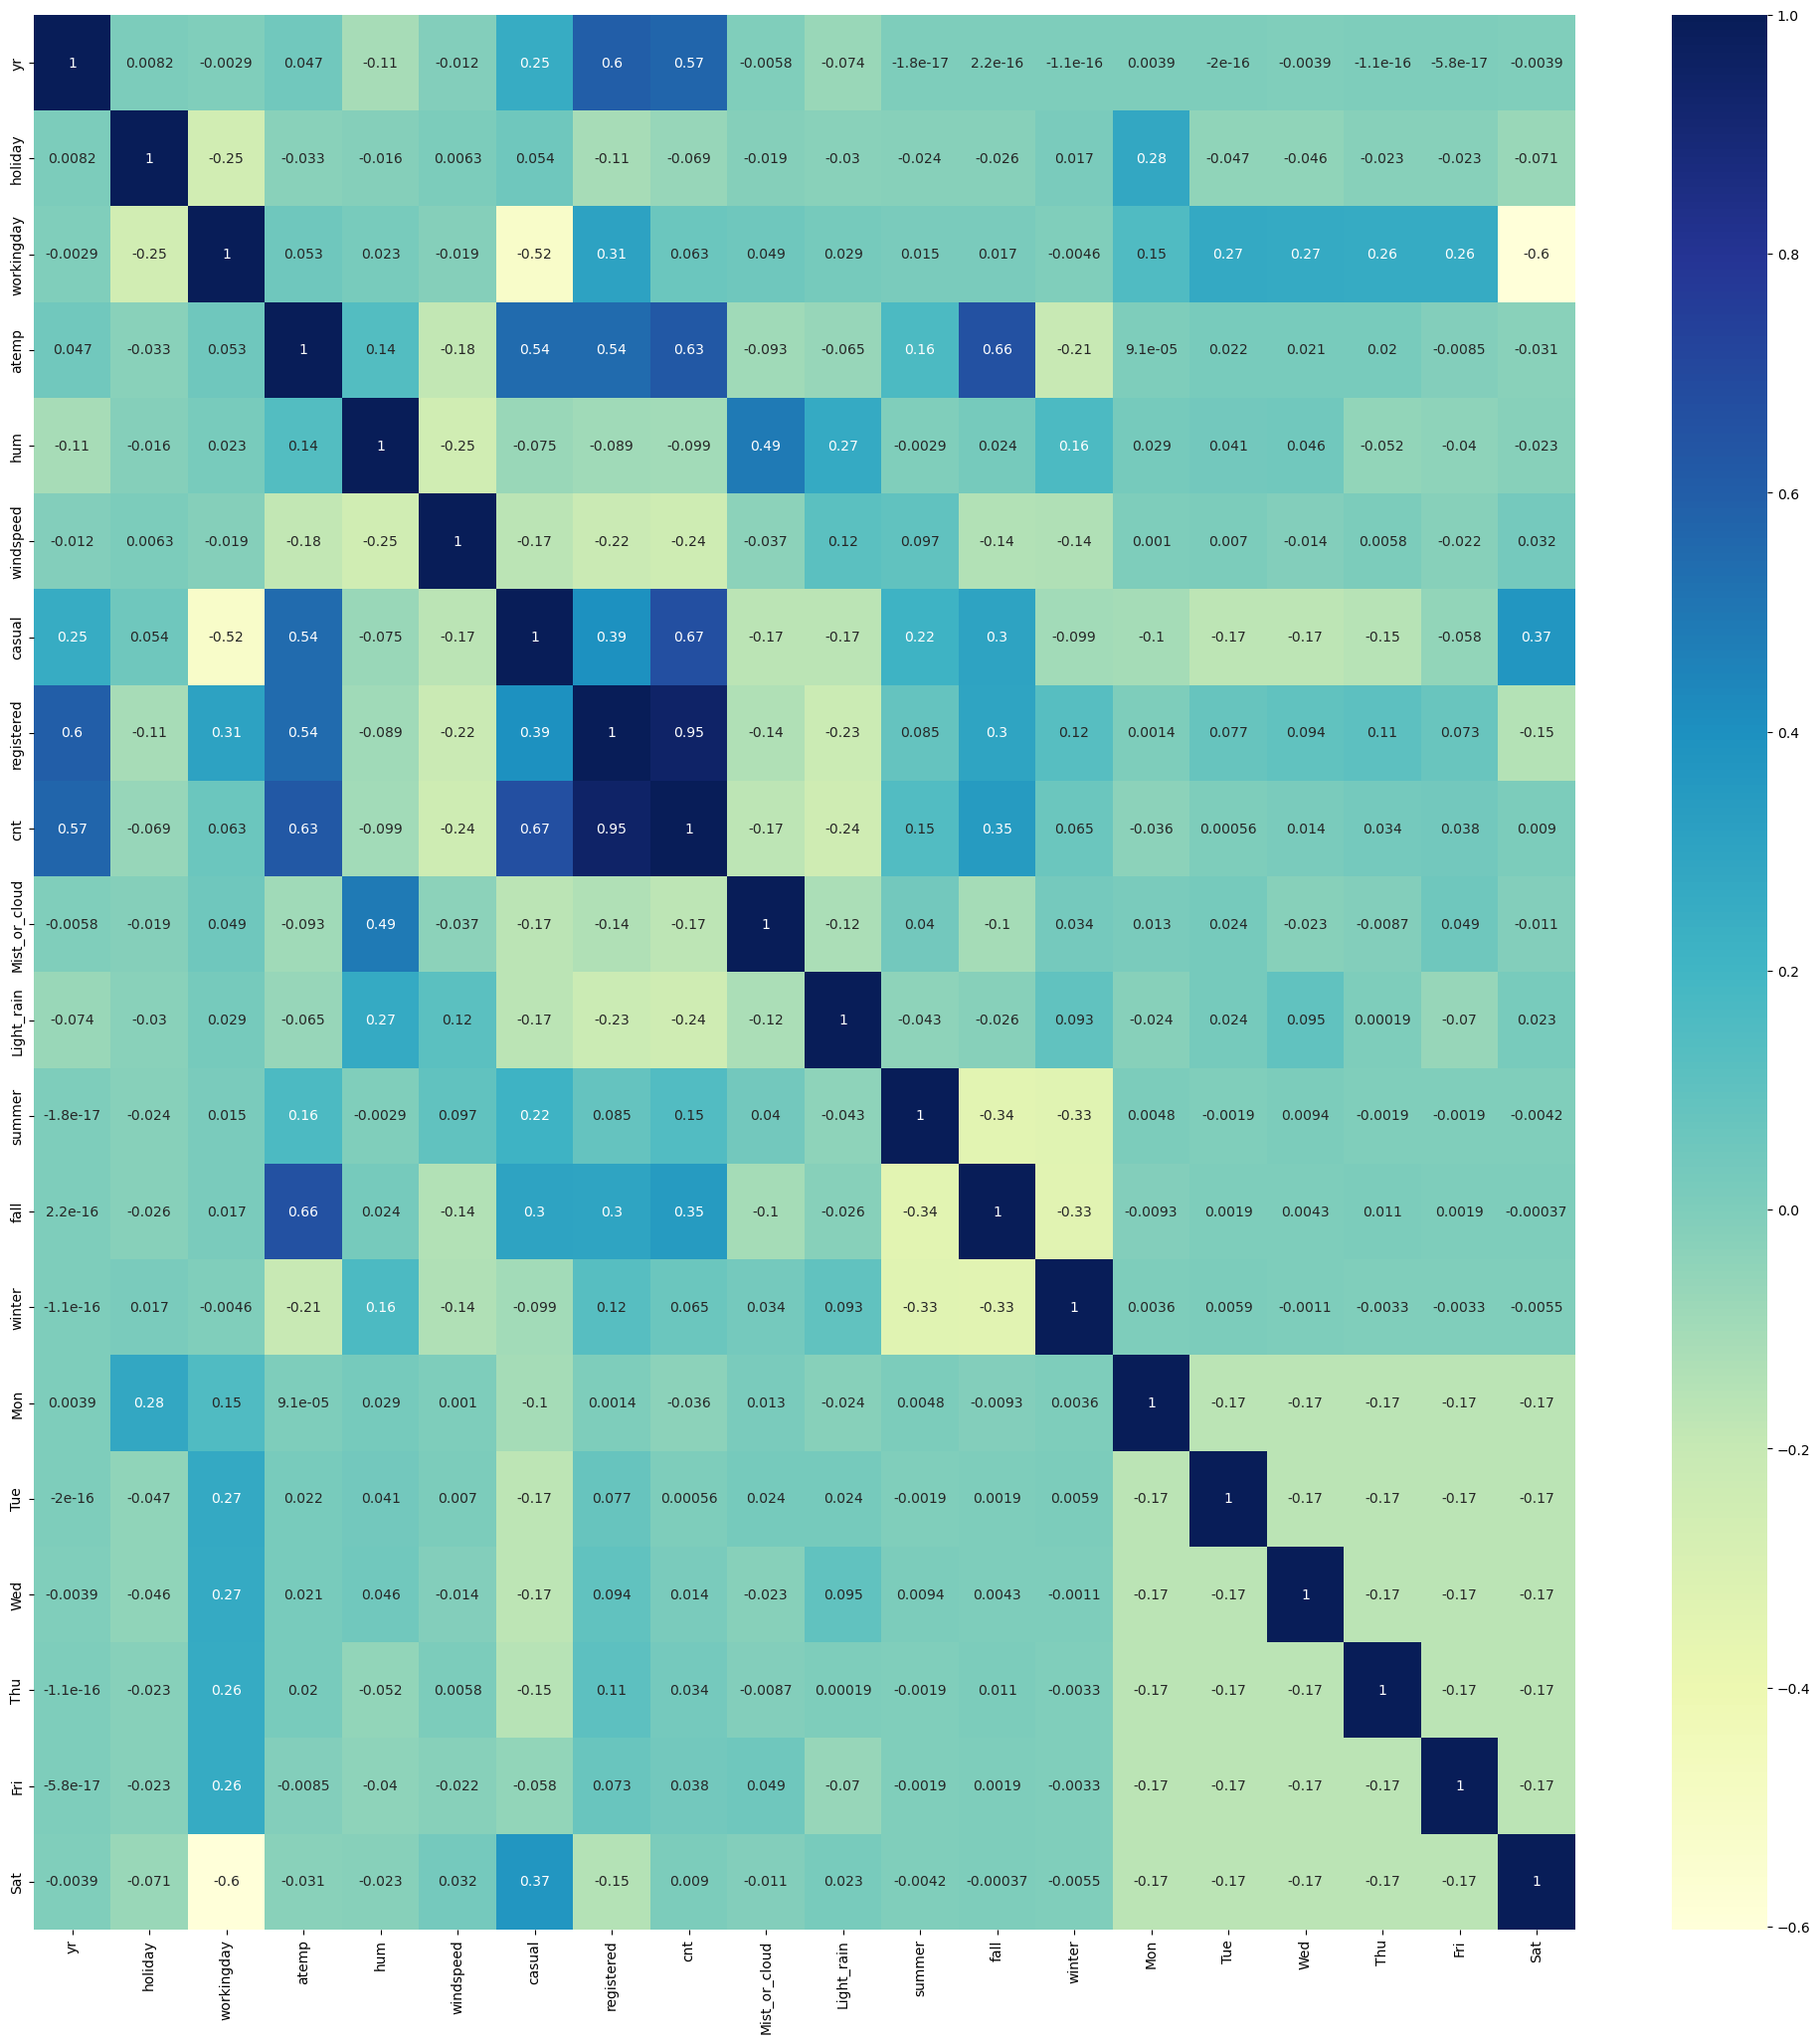

In [1083]:
plt.figure(figsize=(25,25))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Drop the highly correlated feature > 0.6 after normalization

#### Based on above observation, following column can be dropped:--

    - Fall column (Fall and atemp are highly correlated and provide similar information, however atemp contributes more to target variable 'cnt')

In [1026]:
bike = bike.drop(columns=['fall','Sat', 'registered', 'casual'], axis =1)

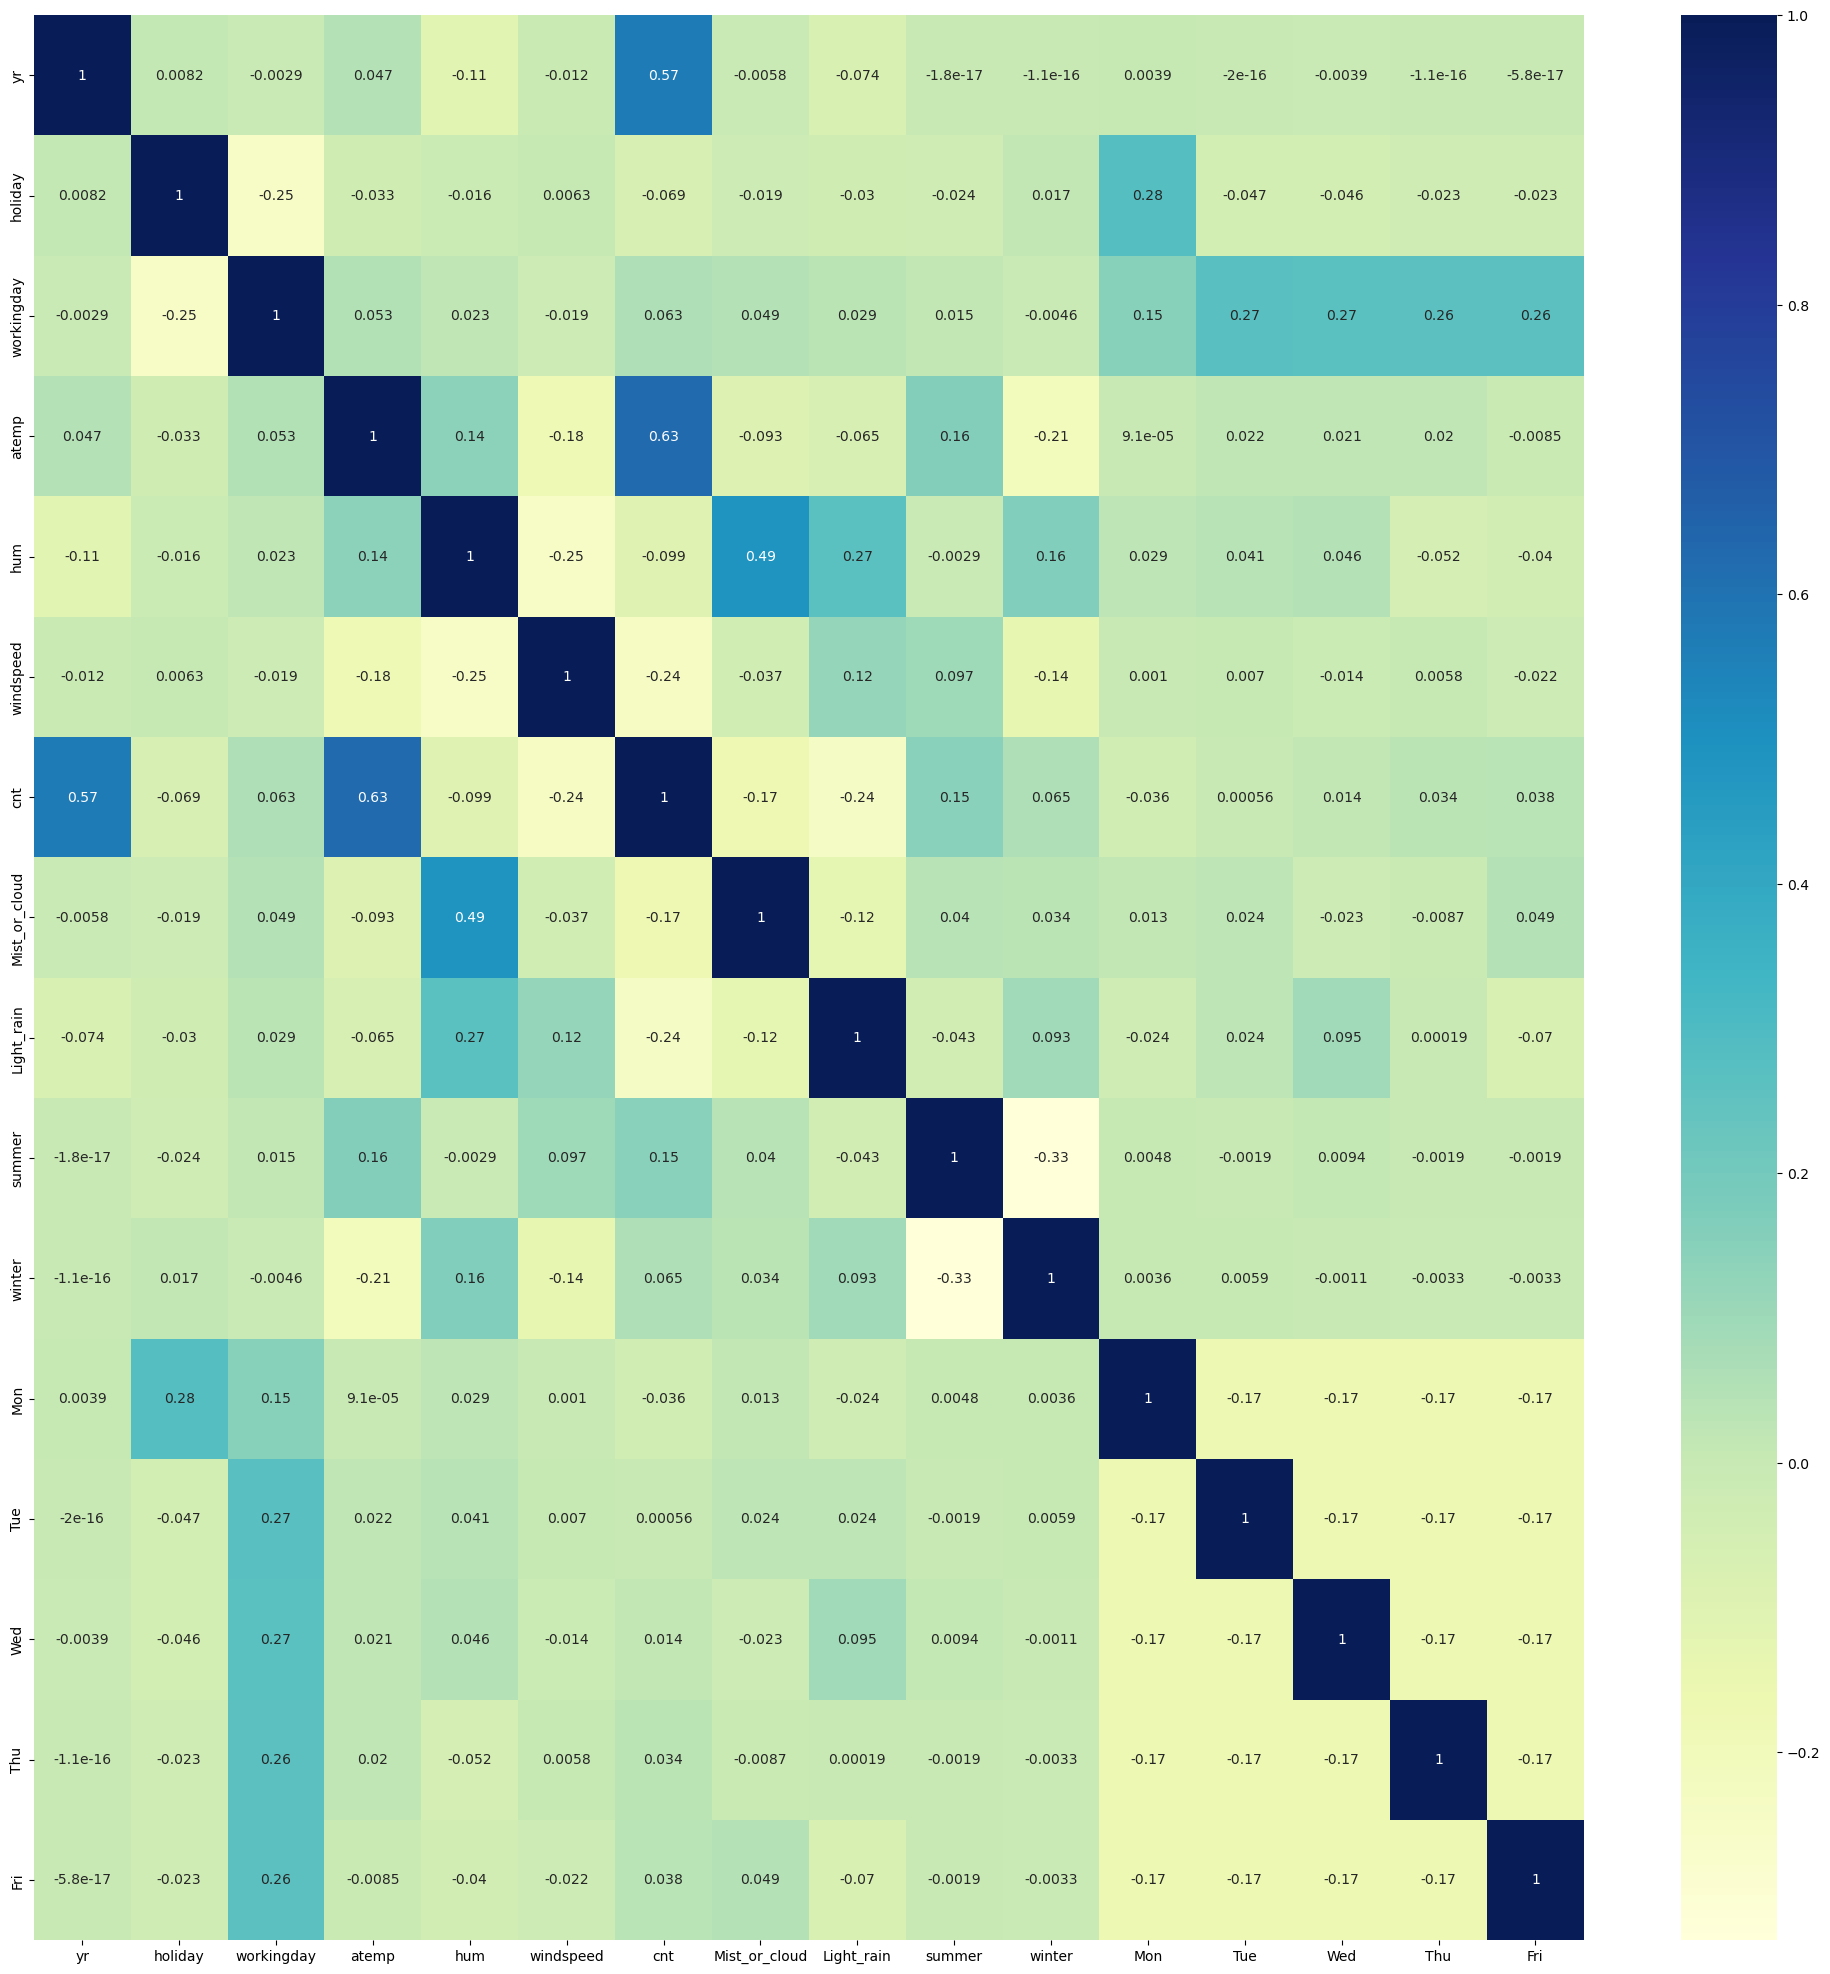

In [1027]:
plt.figure(figsize=(25,25))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

## 4. Feature scaling/Normalization and test-train split

#### Use sklearn inbuilt function(train_test_split) to divide training and test set in 7:3 ratio

In [1028]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.shape, df_test.shape, bike.shape

((510, 16), (219, 16), (730, 16))

#### Normalization using sklearn MinMaxScaler

In [1029]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1030]:
df_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,winter,Mon,Tue,Wed,Thu,Fri
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,0,1,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,1,0,1,0,0,0,0,0,0


In [1031]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'Mist_or_cloud', 'Light_rain', 'summer', 'winter', 'Mon', 'Tue', 'Wed',
       'Thu', 'Fri'],
      dtype='object')

In [1033]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,winter,Mon,Tue,Wed,Thu,Fri
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,1,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,1,0,0,0,0,0,0


In [1034]:
df_train.shape

(510, 16)

#### After Normalization the max values for all the columns are between 0 & 1

In [1035]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Mist_or_cloud,Light_rain,summer,winter,Mon,Tue,Wed,Thu,Fri
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.343137,0.029412,0.245098,0.24902,0.150980,0.131373,0.158824,0.133333,0.127451
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.475223,0.169124,0.430568,0.43287,0.358381,0.338139,0.365870,0.340268,0.333805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Pop the dependent variable('cnt') from the training data set

In [1036]:
y_train = df_train.pop('cnt')
X_train = df_train

## 5. Model building

#### sklearn RFE to find top 10 features impacting the dependent variable ('cnt')

In [1037]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1038]:
X_train.shape

(510, 15)

In [1039]:
lm = LinearRegression()
lm.fit(X_train, y_train)   
rfe = RFE(lm, n_features_to_select=15)          
rfe = rfe.fit(X_train, y_train)

In [1040]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mist_or_cloud', True, 1),
 ('Light_rain', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', True, 1),
 ('Tue', True, 1),
 ('Wed', True, 1),
 ('Thu', True, 1),
 ('Fri', True, 1)]

In [1041]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'Mist_or_cloud', 'Light_rain', 'summer', 'winter', 'Mon', 'Tue', 'Wed',
       'Thu', 'Fri'],
      dtype='object')

In [1042]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [1043]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Visualize the correlation of the selected features

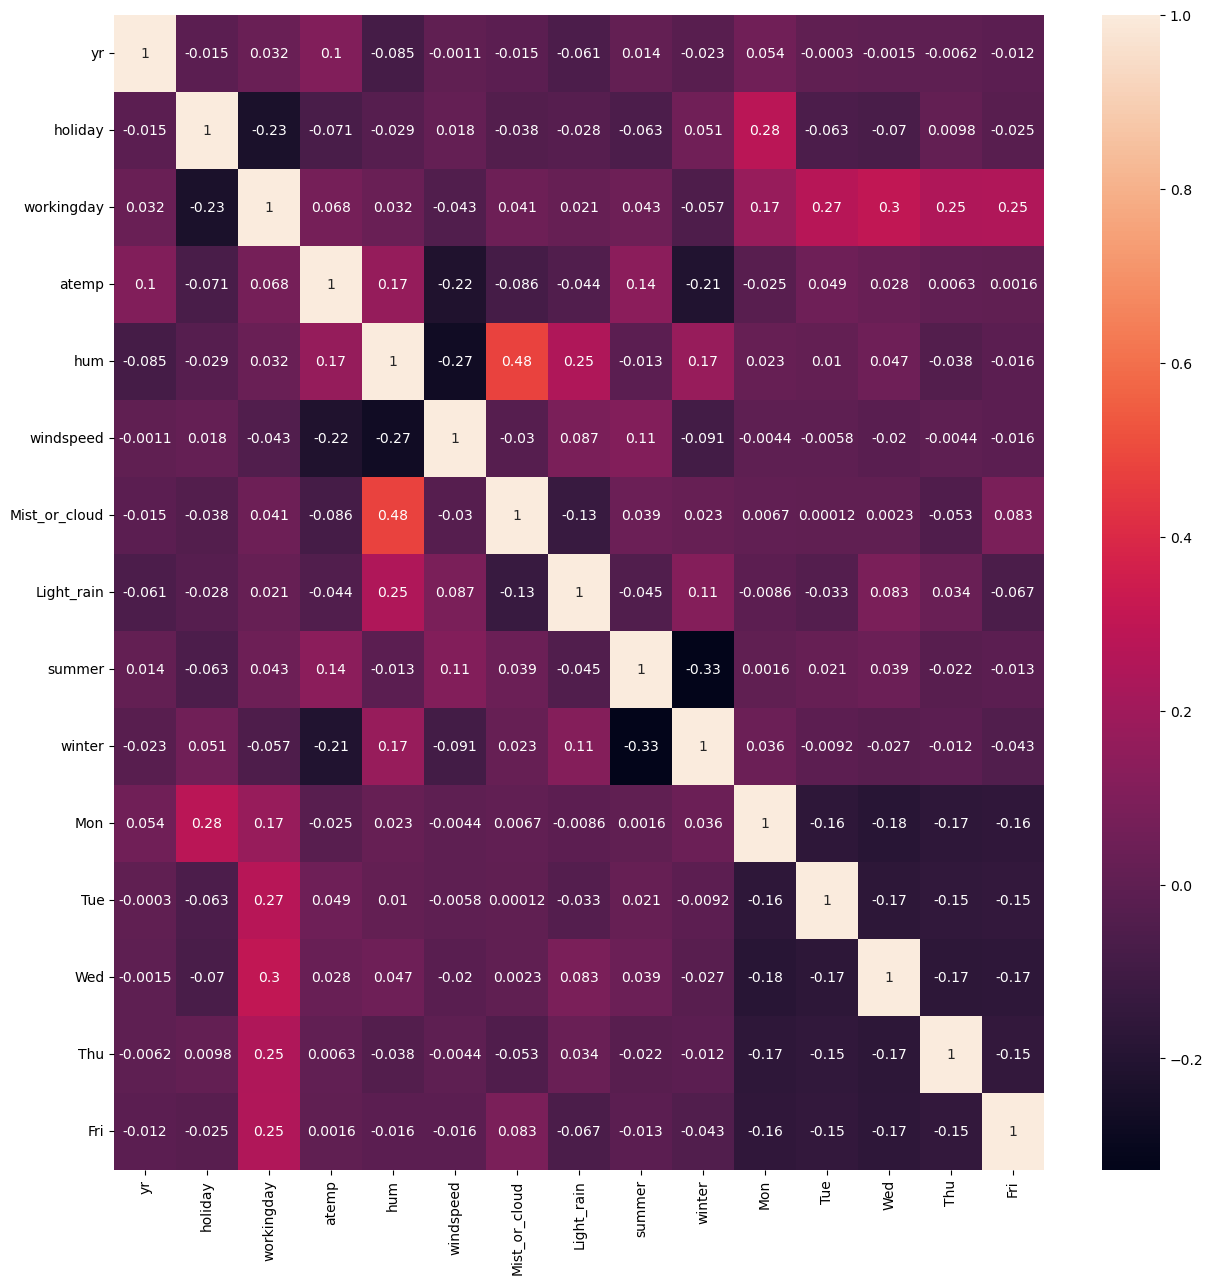

In [1044]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_rfe.corr(),annot=True)
plt.show()

In [1103]:
# Adding a constant variable 
def create_model_calc_vif(X_train_rfe,y_train):
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    #Let's see the summary of our linear model
    print(lm.summary())
    def calculate_vif(X_train_rfe):
        vif = pd.DataFrame()
        X = X_train_rfe
        vif['Features'] = X.columns
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        print(vif)
    return calculate_vif(X_train_rfe)

In [1104]:
create_model_calc_vif(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     158.8
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          8.73e-173
Time:                        20:26:23   Log-Likelihood:                 472.84
No. Observations:                 510   AIC:                            -915.7
Df Residuals:                     495   BIC:                            -852.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1948      0.030      6.568

#### Dropping light_rain since the p-value is greater than 0.05

In [1047]:
X_train_rfe_model_2 =  X_train_rfe.drop(columns=['Wed'], axis =1)
create_model_calc_vif(X_train_rfe_model_2,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     158.8
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          8.73e-173
Time:                        17:09:30   Log-Likelihood:                 472.84
No. Observations:                 510   AIC:                            -915.7
Df Residuals:                     495   BIC:                            -852.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1948      0.030      6.568

In [1049]:
X_train_rfe_model_3 =  X_train_rfe_model_2.drop(columns=['Thu'], axis =1)

In [1050]:
create_model(X_train_rfe_model_3,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          6.94e-174
Time:                        17:09:51   Log-Likelihood:                 472.78
No. Observations:                 510   AIC:                            -917.6
Df Residuals:                     496   BIC:                            -858.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1945      0.030      6.567

In [1051]:
X_train_rfe_model_4 =  X_train_rfe_model_3.drop(columns=['Fri'], axis =1)

In [1052]:
create_model(X_train_rfe_model_4,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          6.57e-175
Time:                        17:10:06   Log-Likelihood:                 472.49
No. Observations:                 510   AIC:                            -919.0
Df Residuals:                     497   BIC:                            -863.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1951      0.030      6.593

In [1053]:
X_train_rfe_model_5 =  X_train_rfe_model_4.drop(columns=['Tue'], axis =1)
create_model(X_train_rfe_model_5,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          9.70e-176
Time:                        17:10:16   Log-Likelihood:                 471.70
No. Observations:                 510   AIC:                            -919.4
Df Residuals:                     498   BIC:                            -868.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1965      0.030      6.644

In [1055]:
X_train_rfe_model_6 =  X_train_rfe_model_5.drop(columns=['Mon'], axis =1)
create_model(X_train_rfe_model_6,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          1.40e-176
Time:                        17:10:36   Log-Likelihood:                 470.89
No. Observations:                 510   AIC:                            -919.8
Df Residuals:                     499   BIC:                            -873.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1978      0.030      6.686

In [1060]:
X_train_rfe_model_7 =  X_train_rfe_model_6.drop(columns=['workingday'], axis =1)
create_model(X_train_rfe_model_7,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          5.29e-177
Time:                        17:13:11   Log-Likelihood:                 469.04
No. Observations:                 510   AIC:                            -918.1
Df Residuals:                     500   BIC:                            -875.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2103      0.029      7.274

In [1061]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_model_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.66
2,atemp,8.00
4,windspeed,3.52
5,Mist_or_cloud,2.11
0,yr,2.01
8,winter,1.63
7,summer,1.52
6,Light_rain,1.16
1,holiday,1.04


In [1062]:
X_train_rfe_model_8 =  X_train_rfe_model_7.drop(columns=['hum'], axis =1)
create_model(X_train_rfe_model_8,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     266.2
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          5.38e-175
Time:                        17:13:27   Log-Likelihood:                 461.41
No. Observations:                 510   AIC:                            -904.8
Df Residuals:                     501   BIC:                            -866.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1215      0.018      6.742

In [1063]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_model_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.34
3,windspeed,2.99
0,yr,2.00
6,summer,1.51
4,Mist_or_cloud,1.47
7,winter,1.38
5,Light_rain,1.08
1,holiday,1.03
